# Лабораторная работа №1 Проведение исследований с алгоритмом KNN

 ## 1.Выбор начальных условий

### А. Задача классфикации

Для задачи классфикации был выбран дата-сет астероидов, проходящих рядом с нашей планетой. Необходимо по параметрам размера и магнитного поля астероида оценить, является ли данный объект опасным для нашей планеты. Это актуальная задача для современной астрономии, так как мы ежеденевно наблюдаем в свои цифровые телескопы сотни новых космических объектов, которые требуют автоматизированного изучения. Справиться с такой не тривиальной задачей могут только модели машинного обучения.

Назовём `df_class` таблицу с данными для классификации

In [1]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = kagglehub.dataset_download("sameepvani/nasa-nearest-earth-objects")
df_class = pd.read_csv('/Users/denisfadeev/.cache/kagglehub/datasets/sameepvani/nasa-nearest-earth-objects/versions/2/neo_v2.csv')
df_class.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


Ознакомимся с данными

In [2]:
df_class.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


## Б. Задача регрессии

Для задачи регрессии был выбран дата-сет, совмещающий в себе ежедневные цены за электричество в Испании за 2015-2021 год и силу ветра, которая была на ветрянных электростанциях, за тот же период. Для крупного бизнеса и производств, которые сильно зависимы от цен на энергоресурсы, важно выстраивать свои планы на кварталы вперёд. Модели машинного обучения могут помочь в нахождении закономерностей в ценах на электричества, благодаря чему предприятия смогут эффективнее выстраивать свои траты. Также данные модели могут пригодиться рейтинговым и статистическим агенствам, чтобы предоставлять обычным гражданам в новостях свои предсказания по комунальным услугам на несколько месяцев вперёд.

Назовём таблицу с этими данными `df_reg`:

In [3]:
path = kagglehub.dataset_download("pythonafroz/wind-speed-vs-spanish-power-prices")
df_reg = pd.read_csv('/Users/denisfadeev/.cache/kagglehub/datasets/pythonafroz/wind-speed-vs-spanish-power-prices/versions/2/wind_vs_price.csv')
df_reg.describe()

,MIN(dp.precio),AVG(dp.precio),MAX(dp.precio),AVG(wd.vel_km_h),MAX(wd.racha_max_km_h)
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,44.114278,56.018941,67.151115,9.585478,49.737020
std,32.775995,37.574542,43.648056,3.057068,15.979315
min,0.010000,1.419583,1.950000,2.250000,19.080000
25%,29.870000,40.250000,49.880000,7.470000,38.880000
50%,39.950000,49.097083,58.210000,9.216000,46.080000
75%,49.080000,60.013334,68.710000,11.232000,56.880000
max,331.400000,383.672501,409.000000,24.983999,133.920000


Ознакомимся с даннными

In [4]:
df_reg.tail()

,fecha,MIN(dp.precio),AVG(dp.precio),MAX(dp.precio),AVG(wd.vel_km_h),MAX(wd.racha_max_km_h)
2552,2021-12-27,2.67,96.078334,207.10,14.760,70.92
2553,2021-12-28,8.06,104.364167,176.03,10.584,54.00
2554,2021-12-29,90.82,181.088333,255.00,9.090,36.00
2555,2021-12-30,174.70,200.681666,252.22,4.410,34.92
2556,2021-12-31,111.10,140.821249,193.15,4.770,33.84


### В. Метрики

- Для классификации я выбрал метрики точности (accuracy) и F1-меры для оценки качества классификации. Эти метрики позволяют хорошо оценить, как модель справляется с различными классами.
- Для регрессионных задач воспользуемся среднеквадратичной ошибкой (MSE) и коэффициентом детерминации (R²), так как они дают ясное представление о точности предсказания.

## 2. Создание бейзлайн и оценка качества

Сначала проведём малейшую подготовку данных, избавимся от лишних столбцов в таблицах, переведём катигориальные признаки в численные.

In [5]:
# В классификации избавляемся от столбцов, не влияющих на результат (различные названия и имена)
df_class = df_class.drop(['orbiting_body','sentry_object', 'name', 'id'],axis=1)
df_class = df_class.sort_values('hazardous', ascending=False).head(2*df_class['hazardous'].value_counts().get(True, 0))

# # В регрессии переводим даты в timestamp и уберём данные после 2019 года, так как там произошёл короновирус
df_reg = df_reg.drop(df_reg[df_reg.fecha > "2020-01-01"].index)
df_reg['time'] = pd.to_datetime(df_reg['fecha']).astype(int)
df_reg = df_reg.drop(['fecha', 'MIN(dp.precio)', 'MAX(dp.precio)'], axis = 1)

### А. Создадим и обучим модели

Создаём модели и режем данные на тестовую и тренировочную выборки

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import metrics

# classifiaction
Y_class = df_class['hazardous'].astype(int)
X_class = df_class.drop(['hazardous'],axis=1)
X_train_class, X_test_class, Y_train_class, Y_test_class = train_test_split(X_class,Y_class,random_state=24314,test_size=0.5, shuffle = True)
# regression
Y_reg = df_reg['AVG(dp.precio)']
X_reg = df_reg.drop(['AVG(dp.precio)'],axis=1)
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X_reg,Y_reg,random_state=24314,test_size=0.5, shuffle = True)


Обучаем модели

In [7]:
# classification train
knn_class = KNeighborsClassifier(n_neighbors=3)
knn_class.fit(X_train_class, Y_train_class)

# regression train
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train_reg, Y_train_reg)

KNeighborsRegressor(n_neighbors=3)

### Б. Оценка качества моделей

**Оценка качества классификации**

In [8]:
predicted_class = knn_class.predict(X_test_class)
print("Classification accuracy score = ",metrics.accuracy_score(Y_test_class,predicted_class))
print("Classification CM score\n================\n",metrics.confusion_matrix(Y_test_class,predicted_class))
print("================\nClassification F1 score = ",metrics.f1_score(Y_test_class,predicted_class, average='weighted'))

Classification accuracy score =  0.5670814479638009
Classification CM score
 [[2512 1900]
 [1927 2501]]
Classification F1 score =  0.5670798026119316


***На не предобработанных данных задачи классификации решается чуть лучше, чем обычное угадывание.***

**Теперь оценим регрессию**

In [9]:
predicted_reg = knn_reg.predict(X_test_reg)
print("MSE score = ",metrics.mean_squared_error(Y_test_reg, predicted_reg))
print("R2 score = ",metrics.r2_score(Y_test_reg, predicted_reg))

MSE score =  43.62374512130325
R2 score =  0.7188524858039116


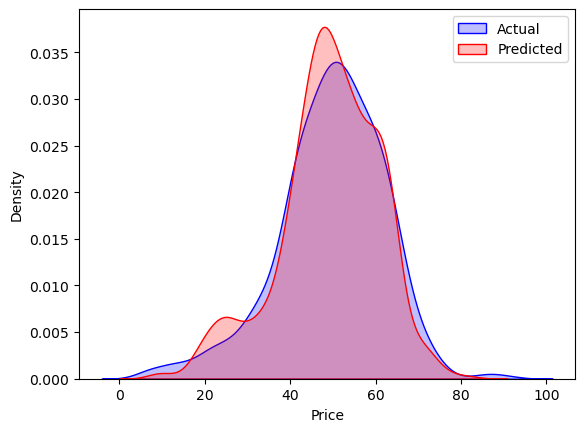

In [10]:
import seaborn as sns
sns.kdeplot(Y_test_reg, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_reg, label='Predicted', color='red', fill=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()

Модель регрессии тоже показала неплохую точность на сырых данных. 

## 3.Улучшение бейз лайнов 

## А. Формирование гипотез. 

Предлагаю оценить качество используемых данных на матрицах кореляции. Возможно мы увидим некоторые закономерности

**Классификация**

<Axes: >

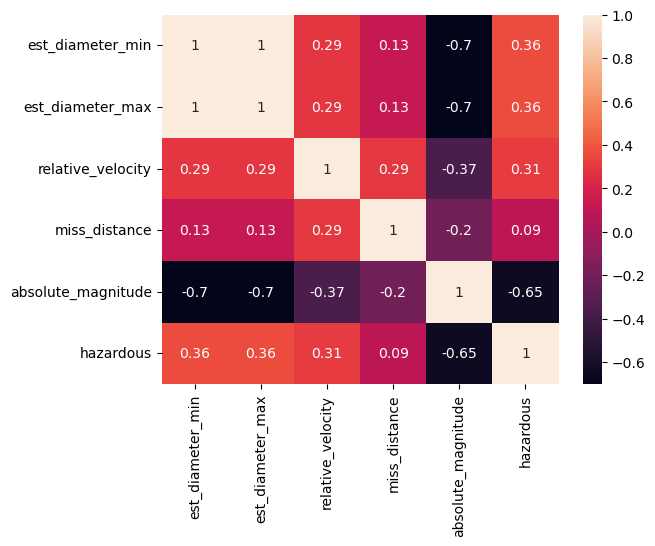

In [11]:
df_class = pd.read_csv('/Users/denisfadeev/.cache/kagglehub/datasets/sameepvani/nasa-nearest-earth-objects/versions/2/neo_v2.csv')
df_class = df_class.drop(['orbiting_body','sentry_object', 'name', 'id'],axis=1)
df_class = df_class.sort_values('hazardous', ascending=False).head(2*df_class['hazardous'].value_counts().get(True, 0))

# classification
sns.heatmap(df_class.corr(numeric_only=True),annot=True,)

Кореляция между минимальным и максимальным диаметро объекта равна 1! В таком случае лучше объединить их в один параметр mean_size. К тому же с ними сильно корелирует важный параметр магнитуды.

Также посмотрим как распределены классы в зависимости от разных параметров

In [12]:
df_class['size'] = df_class[['est_diameter_min','est_diameter_max']].mean(axis=1)
df_class = df_class.drop(['est_diameter_min','est_diameter_max'],axis=1)

Построим графики зависимости значений параметров от классов и других параметров

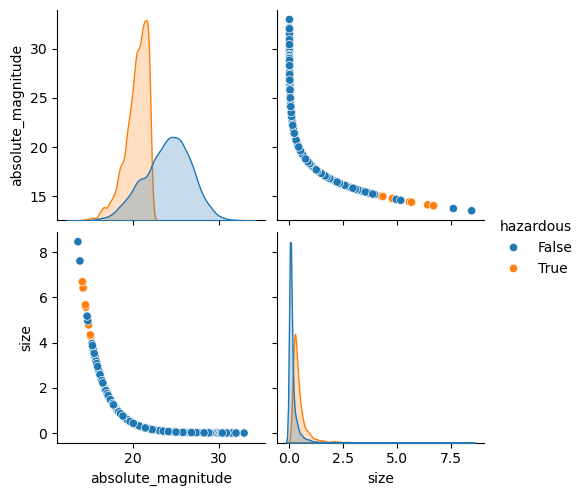

In [13]:
sns.pairplot(df_class[['absolute_magnitude', 'size', 'hazardous']],aspect=1,kind='scatter',hue='hazardous')

Возможно помочь в классфикации нам может использование не численных классов, а one-hot-encoding и кросс-валидация. 

Модели KNN чувствительны к значениям данных, поэтому желательно опробовать различные Scallers в предпроцессинге

**Анализ регрессии**

В скачанном датасете есть несколько таблиц. В начале я использовал толко ту, в которой сводится цена и скорость ветра. Но есть отдельная таблица с ценами за электричество каждые 4 часа. Если мы объединим обе таблицы, то мы сможем более точно отслеживать как влияет временной промежуток на цену за электричество.

In [14]:
df_reg = pd.read_csv('/Users/denisfadeev/.cache/kagglehub/datasets/pythonafroz/wind-speed-vs-spanish-power-prices/versions/2/wind_vs_price.csv')
df_reg_price = pd.read_csv('/Users/denisfadeev/.cache/kagglehub/datasets/pythonafroz/wind-speed-vs-spanish-power-prices/versions/2/da_price.csv')
df_reg_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60028 entries, 0 to 60027
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime_utc         60028 non-null  object 
 1   sistema              60028 non-null  object 
 2   fecha                60028 non-null  object 
 3   hora                 60028 non-null  int64  
 4   bandera              60028 non-null  int64  
 5   precio               60028 non-null  float64
 6   fecha_actualizacion  60028 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ MB


Сформируем новые параметры в дата-сете. Будем отмечать время замера ветра, день недели, месяц ну timestamp

In [15]:
df_reg = df_reg.drop(df_reg[df_reg.fecha > "2020-01-01"].index)
df_reg = df_reg.drop(['AVG(dp.precio)', 'MIN(dp.precio)', 'MAX(dp.precio)'],axis=1)
df_reg = pd.merge(df_reg_price, df_reg, on='fecha', how='left')
df_reg = df_reg.dropna(how='any',axis=0)
df_reg['datetime_utc'] = pd.to_datetime(df_reg['datetime_utc'])
df_reg = df_reg.drop(['fecha', 'sistema', 'bandera', 'fecha_actualizacion'],axis=1)
# новый параметр дня недели
df_reg['date_of_week'] = df_reg['datetime_utc'].dt.day_name().astype('category')
# новый параметр месяца
df_reg['month'] = df_reg['datetime_utc'].dt.month.astype('category')
df_reg.head()

,datetime_utc,hora,precio,AVG(wd.vel_km_h),MAX(wd.racha_max_km_h),date_of_week,month
17520,2020-01-01 22:00:00,24,37.55,3.51,24.12,Wednesday,1
17521,2020-01-01 21:00:00,23,42.90,3.51,24.12,Wednesday,1
17522,2020-01-01 20:00:00,22,45.60,3.51,24.12,Wednesday,1
17523,2020-01-01 19:00:00,21,44.02,3.51,24.12,Wednesday,1
17524,2020-01-01 18:00:00,20,46.16,3.51,24.12,Wednesday,1


Теперь мы имеем более подробные данные, для которых можно посмотреть кореляцию

<Axes: >

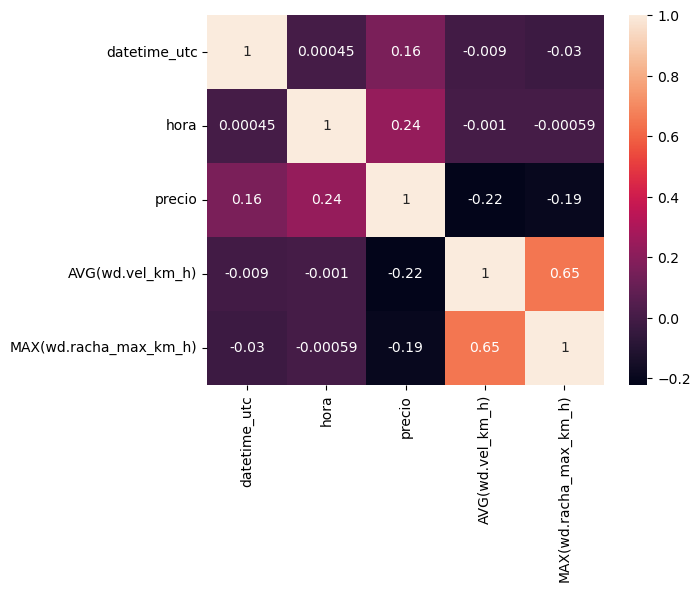

In [16]:
df_reg['datetime_utc'] = df_reg['datetime_utc'].astype(int)
sns.heatmap(df_reg.corr(numeric_only=True),annot=True,)

Посмотрим как от месяца зависит средняя цена. Кореляция получается очень заметной

<Axes: xlabel='month', ylabel='precio'>

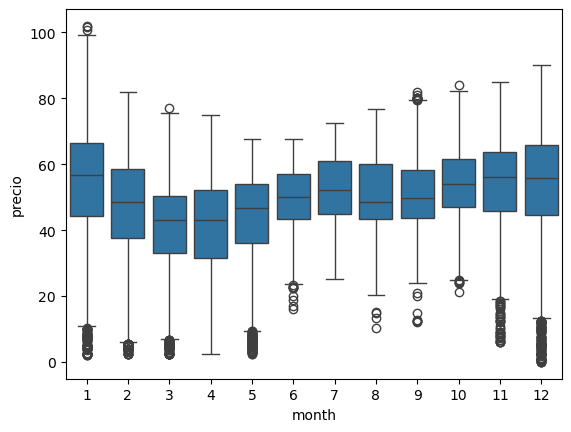

In [17]:
sns.boxplot(data=df_reg, y='precio', x='month')

Теперь кореляция для дня недели

<Axes: xlabel='date_of_week', ylabel='precio'>

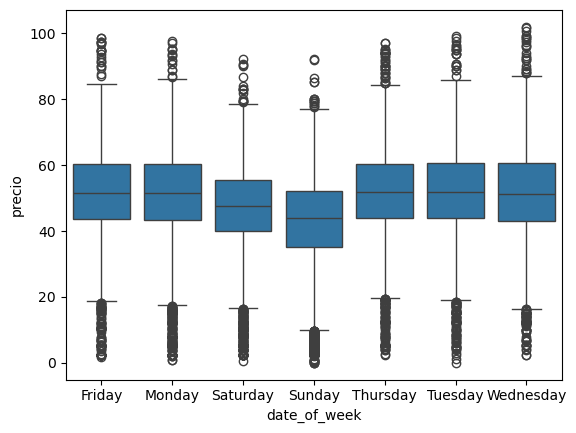

In [18]:
sns.boxplot(data=df_reg, y='precio', x='date_of_week')

Значения цены за весь период наблюдений

<Axes: xlabel='datetime_utc', ylabel='precio'>

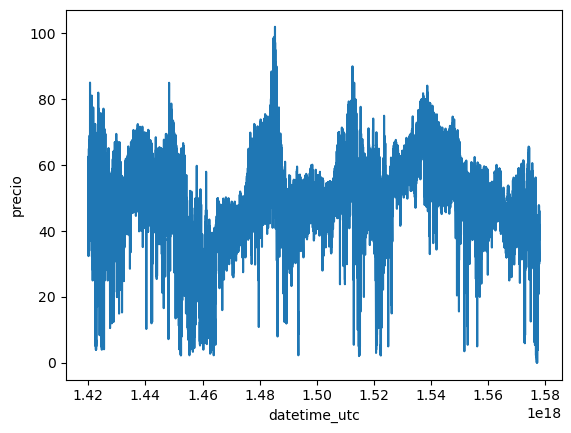

In [19]:
sns.lineplot(data=df_reg, x="datetime_utc", y="precio")

Здесь также можно применить one-hot-encoding

### Итоговые гипотезы

- Классификация
  - Объединение параметров размера астероида
  - OneHotEncoding
  - StandardScaling
  - Кроссвалидация
- Регрессия
  - Объединение таблицы цены и силы ветра
  - Объединение параметров среднего и максимального силы ветра
  - OneHotEncoding
  - Кроссвалидация

### С. Формирование улучшенного бейзлайна

OneHotEncoding

In [20]:
!pip install category_encoders

In [21]:
import category_encoders as ce
ohe_encoder = ce.OneHotEncoder(cols = ['hazardous'])
df_class['hazardous'] = df_class['hazardous'].astype(str)
df_class = ohe_encoder.fit_transform(df_class)
df_class

,relative_velocity,miss_distance,absolute_magnitude,hazardous_1,hazardous_2,size
48088,50793.086949,2.222168e+07,20.10,1,0,0.410717
40799,38606.221002,2.612210e+07,16.62,1,0,2.039589
54768,72930.239746,6.967326e+07,19.10,1,0,0.650942
9062,34256.807052,5.432752e+07,19.00,1,0,0.681620
31498,39667.868076,2.030752e+07,20.90,1,0,0.284147
...,...,...,...,...,...,...
53898,76894.404596,7.371090e+07,21.40,0,1,0.225706
53897,19418.384333,4.576340e+07,19.62,0,1,0.512322
53896,18849.804641,5.985635e+07,20.00,0,1,0.430073
53894,63766.692910,5.587903e+07,28.27,0,1,0.009540


Производим OneHotEncoding

In [22]:
ohe_encoder = ce.OneHotEncoder(cols = ['month', 'date_of_week', 'hora'])
df_reg = ohe_encoder.fit_transform(df_reg)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42508 entries, 17520 to 60027
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime_utc            42508 non-null  int64  
 1   hora_1                  42508 non-null  int64  
 2   hora_2                  42508 non-null  int64  
 3   hora_3                  42508 non-null  int64  
 4   hora_4                  42508 non-null  int64  
 5   hora_5                  42508 non-null  int64  
 6   hora_6                  42508 non-null  int64  
 7   hora_7                  42508 non-null  int64  
 8   hora_8                  42508 non-null  int64  
 9   hora_9                  42508 non-null  int64  
 10  hora_10                 42508 non-null  int64  
 11  hora_11                 42508 non-null  int64  
 12  hora_12                 42508 non-null  int64  
 13  hora_13                 42508 non-null  int64  
 14  hora_14                 42508 non-null 

Создаем синтетические параметры

In [23]:
# Объединение параметров ветра
df_reg['wind'] = df_reg[['AVG(wd.vel_km_h)','MAX(wd.racha_max_km_h)']].mean(axis=1)
df_reg = df_reg.drop(['AVG(wd.vel_km_h)','MAX(wd.racha_max_km_h)'],axis=1)

Деление данных

In [24]:
# classification
Y_class = df_class[['hazardous_1', 'hazardous_2']]
X_class = df_class.drop(['hazardous_1', 'hazardous_2'],axis=1)
X_train_class, X_test_class, Y_train_class, Y_test_class = train_test_split(X_class,Y_class,random_state=24314,test_size=0.5, shuffle = True)
# regression
Y_reg = df_reg['wind']
X_reg = df_reg.drop(['wind'],axis=1)
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X_reg,Y_reg,random_state=24314,test_size=0.5, shuffle = True)

Препроцессинг

In [25]:
from sklearn.preprocessing import StandardScaler

scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.fit_transform(X_test_class)

Кроссвалидация

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}

grid_search_class = GridSearchCV(KNeighborsClassifier(), param_grid, cv=7)
grid_search_class.fit(X_train_class, Y_train_class)

grid_search_reg = GridSearchCV(KNeighborsRegressor(), param_grid, cv=7)
grid_search_reg.fit(X_train_reg, Y_train_reg)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13]})

In [27]:
print(f"Best n_neighbors for classification: {grid_search_class.best_params_}")
print(f"Best n_neighbors for regression: {grid_search_reg.best_params_}")

Best n_neighbors for classification: {'n_neighbors': 13}
Best n_neighbors for regression: {'n_neighbors': 1}


### d. Обучение моделей

In [28]:
knn_class_improved = grid_search_class.best_estimator_
knn_class_improved.fit(X_train_class, Y_train_class)

knn_reg_improved = grid_search_reg.best_estimator_
knn_reg_improved.fit(X_train_reg, Y_train_reg)

KNeighborsRegressor(n_neighbors=1)

### e. Оценка качества моделей

**Классификация**

In [29]:
predicted_class = knn_class_improved.predict(X_test_class)
print("Classification accuracy score = ",metrics.accuracy_score(Y_test_class,predicted_class))
print("================\nClassification F1 score = ",metrics.f1_score(Y_test_class,predicted_class, average='weighted'))

Classification accuracy score =  0.8748868778280543
Classification F1 score =  0.87336190985962


**Регрессия**

MSE score =  7.056404004228239
R2 score =  0.9151077893711379


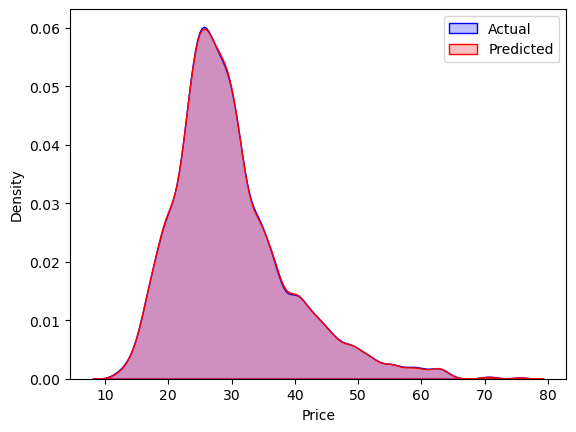

In [30]:
predicted_reg = knn_reg_improved.predict(X_test_reg)
print("MSE score = ",metrics.mean_squared_error(Y_test_reg, predicted_reg))
print("R2 score = ",metrics.r2_score(Y_test_reg, predicted_reg))

sns.kdeplot(Y_test_reg, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_reg, label='Predicted', color='red', fill=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()

Результаты получились очень хорошие. Регрессия указывает очень точные ответы, а классификация повысила свою точность на несколько процентов.
**При этом мы на тренировки отдали только половину данных**

## f. Сравнение результатов

Препроцессинг данных и кроссвалидация дали свой результат. Мы смогли на несколько процентов увеличить точность классификации и ***добились на 16% увеличения точности регресиии***.

Это показывает, насколько важно для тренировки модели правильно подобрать и обработать данные для них. 

# 4.Имплементация алгоритма машинного обучения

### А. Собственная реализация KNN классификации и регрессиии

Классификация

In [31]:
import numpy as np

class MyKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.Y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

Регрессия

In [32]:
class MyKNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.Y_train[i] for i in k_indices]
        return np.mean(k_nearest_labels)

### Б. Обучение и оценка моделей 

In [33]:
df_class = pd.read_csv('/Users/denisfadeev/.cache/kagglehub/datasets/sameepvani/nasa-nearest-earth-objects/versions/2/neo_v2.csv')
df_class = df_class.drop(['orbiting_body','sentry_object', 'name', 'id'],axis=1)
df_class = df_class.sort_values('hazardous', ascending=False).head(2*df_class['hazardous'].value_counts().get(True, 0))
df_reg = pd.read_csv('/Users/denisfadeev/.cache/kagglehub/datasets/pythonafroz/wind-speed-vs-spanish-power-prices/versions/2/wind_vs_price.csv')
df_reg = df_reg.drop(df_reg[df_reg.fecha > "2020-01-01"].index)
df_reg['time'] = pd.to_datetime(df_reg['fecha']).astype(int)
df_reg = df_reg.drop(['fecha', 'MIN(dp.precio)', 'MAX(dp.precio)'], axis = 1)

Деление на тестовую и обучающую выборки

In [34]:
DATA_SIZE = 1000

# classification
Y_class = df_class['hazardous'].astype(int)
X_class = df_class.drop(['hazardous'],axis=1)
X_train_class, X_test_class, Y_train_class, Y_test_class = train_test_split(X_class,Y_class,random_state=24314,test_size=0.5, shuffle = True)

X_train_class, X_test_class, Y_train_class, Y_test_class = X_train_class.head(DATA_SIZE), X_test_class.head(DATA_SIZE), Y_train_class.head(DATA_SIZE), Y_test_class.head(DATA_SIZE)
# regression
Y_reg = df_reg['AVG(dp.precio)']
X_reg = df_reg.drop(['AVG(dp.precio)'],axis=1)
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X_reg,Y_reg,random_state=24314,test_size=0.5, shuffle = True)
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = X_train_reg.head(DATA_SIZE), X_test_reg.head(DATA_SIZE), Y_train_reg.head(DATA_SIZE), Y_test_reg.head(DATA_SIZE)

Обучение будет происходить на меньшей выборке данный, так как самописная модель не может работать с болшими датасетами

**Классификация**

In [35]:
my_knn_class = MyKNN(k=3)
my_knn_class.fit(X_train_class.to_numpy(), Y_train_class.to_numpy())
predicted_class = my_knn_class.predict(X_test_class.to_numpy())
print("Classification accuracy score = ",metrics.accuracy_score(Y_test_class,predicted_class))
print("Classification CM score\n================\n",metrics.confusion_matrix(Y_test_class,predicted_class))
print("================\nClassification F1 score = ",metrics.f1_score(Y_test_class,predicted_class, average='weighted'))

Classification accuracy score =  0.52
Classification CM score
 [[260 260]
 [220 260]]
Classification F1 score =  0.52


Полученные результаты для собственной классификации получились хуже библиотечной, но не сильно

**Регрессия**

MSE score =  43.91166933138488
R2 score =  0.7169968639237583


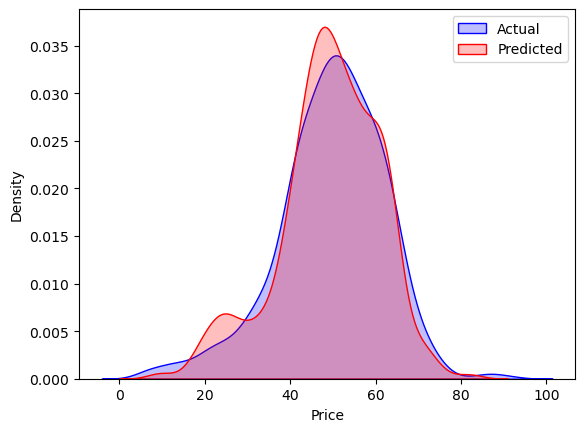

In [36]:
model = MyKNNRegressor(k=3)
model.fit(X_train_reg.to_numpy(), Y_train_reg.to_numpy())
predicted_reg = model.predict(X_test_reg.to_numpy())
print("MSE score = ",metrics.mean_squared_error(Y_test_reg, predicted_reg))
print("R2 score = ",metrics.r2_score(Y_test_reg, predicted_reg))

sns.kdeplot(Y_test_reg, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_reg, label='Predicted', color='red', fill=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()

Регрессия показала тоже хорошие показатели предсказания, но они также ниже чем у библиотечных реализаций KNN regression

### В. Применение улучшенного бейзлайна

In [37]:
df_class = pd.read_csv('/Users/denisfadeev/.cache/kagglehub/datasets/sameepvani/nasa-nearest-earth-objects/versions/2/neo_v2.csv')
df_class = df_class.drop(['orbiting_body','sentry_object', 'name', 'id'],axis=1)
df_class = df_class.sort_values('hazardous', ascending=False).head(2*df_class['hazardous'].value_counts().get(True, 0))
df_class['size'] = df_class[['est_diameter_min','est_diameter_max']].mean(axis=1)
df_class = df_class.drop(['est_diameter_min','est_diameter_max'],axis=1)

df_reg = pd.read_csv('/Users/denisfadeev/.cache/kagglehub/datasets/pythonafroz/wind-speed-vs-spanish-power-prices/versions/2/wind_vs_price.csv')
df_reg_price = pd.read_csv('/Users/denisfadeev/.cache/kagglehub/datasets/pythonafroz/wind-speed-vs-spanish-power-prices/versions/2/da_price.csv')
df_reg = df_reg.drop(df_reg[df_reg.fecha > "2020-01-01"].index)
df_reg = df_reg.drop(['AVG(dp.precio)', 'MIN(dp.precio)', 'MAX(dp.precio)'],axis=1)
df_reg = pd.merge(df_reg_price, df_reg, on='fecha', how='left')
df_reg = df_reg.dropna(how='any',axis=0)
df_reg['datetime_utc'] = pd.to_datetime(df_reg['datetime_utc'])
df_reg = df_reg.drop(['fecha', 'sistema', 'bandera', 'fecha_actualizacion'],axis=1)
# новый параметр дня недели
df_reg['date_of_week'] = df_reg['datetime_utc'].dt.day_name().astype('category')
# новый параметр месяца
df_reg['month'] = df_reg['datetime_utc'].dt.month.astype('category')
df_reg['datetime_utc'] = df_reg['datetime_utc'].astype(int)

ohe_encoder = ce.OneHotEncoder(cols = ['month', 'date_of_week', 'hora'])
df_reg = ohe_encoder.fit_transform(df_reg)
# Объединение параметров ветра
df_reg['wind'] = df_reg[['AVG(wd.vel_km_h)','MAX(wd.racha_max_km_h)']].mean(axis=1)
df_reg = df_reg.drop(['AVG(wd.vel_km_h)','MAX(wd.racha_max_km_h)'],axis=1)

### Г. Обучение и оценка моделей

Деление на тестовую и обучающую выборку

In [38]:
# classification
Y_class = df_class['hazardous'].astype(int)
X_class = df_class.drop(['hazardous'],axis=1)
X_train_class, X_test_class, Y_train_class, Y_test_class = train_test_split(X_class,Y_class,random_state=24314,test_size=0.5, shuffle = True)
X_train_class, X_test_class, Y_train_class, Y_test_class = X_train_class.head(DATA_SIZE), X_test_class.head(DATA_SIZE), Y_train_class.head(DATA_SIZE), Y_test_class.head(DATA_SIZE)

# regression
Y_reg = df_reg['wind']
X_reg = df_reg.drop(['wind'],axis=1)
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X_reg,Y_reg,random_state=24314,test_size=0.5, shuffle = True)
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = X_train_reg.head(DATA_SIZE), X_test_reg.head(DATA_SIZE), Y_train_reg.head(DATA_SIZE), Y_test_reg.head(DATA_SIZE)

Обучение с кроссвалидацией

In [39]:
k_range = range(1, 11, 2)
MAX_ACC = 0
MAX_R2 = 0
MAX_K_CLASS = 0
MAX_K_REG = 0
BEST_CLASS = None
BEST_REG = None
for K in k_range:
    knn = MyKNN(K)
    knn.fit(X_train_class.to_numpy(), Y_train_class.to_numpy())
    Y_pred = knn.predict(X_test_class.to_numpy())
    acc = metrics.accuracy_score(Y_test_class, Y_pred)
    if acc > MAX_ACC:
        MAX_ACC, MAX_K_CLASS, BEST_CLASS = acc, K, knn

for K in k_range:
    knn = MyKNNRegressor(K)
    knn.fit(X_train_reg.to_numpy(), Y_train_reg.to_numpy())
    Y_pred = knn.predict(X_test_reg.to_numpy())
    acc = metrics.r2_score(Y_test_reg, Y_pred)
    if acc > MAX_R2:
        MAX_R2, MAX_K_REG, BEST_REG = acc, K, knn


print(f"Best n_neighbors for classification: {MAX_K_CLASS}")
print(f"Best n_neighbors for regression: {MAX_K_REG}")

Best n_neighbors for classification: 9
Best n_neighbors for regression: 3


Оценка классификации

In [40]:
predicted_class = BEST_CLASS.predict(X_test_class.to_numpy())
print("Classification accuracy score = ",metrics.accuracy_score(Y_test_class,predicted_class))
print("================\nClassification F1 score = ",metrics.f1_score(Y_test_class,predicted_class, average='weighted'))

Classification accuracy score =  0.535
Classification F1 score =  0.5338785937886359


 Оценка регрессии

MSE score =  71.2695567260669
R2 score =  0.2279797122367112


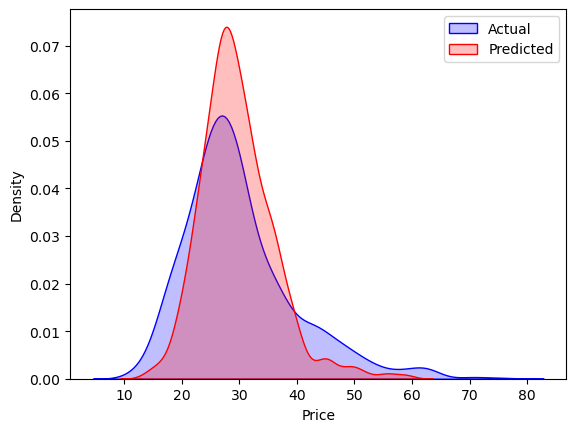

In [41]:
predicted_reg = BEST_REG.predict(X_test_reg.to_numpy())
print("MSE score = ",metrics.mean_squared_error(Y_test_reg, predicted_reg))
print("R2 score = ",metrics.r2_score(Y_test_reg, predicted_reg))

sns.kdeplot(Y_test_reg, label='Actual', color='blue', fill=True)
sns.kdeplot(predicted_reg, label='Predicted', color='red', fill=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()

Задача регресси собственным KNN решается гораздо хуже, чем бибилиотечными моделями. Улучшенный бейзлайн только испортил предсказания модели

# Сравнительные выводы

Соберём все лучшие результаты и метрики внутри одной таблицы чтобы провести итоговое сравнение всех моделей

|Модель|Метрики обычного бейзлайна|Метрики улучшенного бейзлайна|
|---|---|---|
|KNN классификатор|max_acc = 0.567 max_F1 = 0.567|max_acc = 0.874 max_F1 = 0.873|
|Мой KNN классификатор|max_acc = 0.52 max_F1 = 0.52|max_acc = 0.535 max_F1 = 0.535|
|KNN регрессия|min_MSE = 43.62 max_R2 = 0.7188|min_MSE = 7.056 max_R2 = 0.9151|
|Моя KNN регрессия|min_MSE = 43.91 max_R2 = 0.7169|min_MSE = 71.26 max_R2 = 0.227|


В ходе лабораторной работы получилось добиться почти во всех случаях улучшения качества предсказания и классификации для моделей за счет улучшенного бейзлайна. Исключением сатал собственная реализвция регрессии KNN, которая показала наихудший результат на улучшенном бейзлайне.

Во всех случаях библиотечная реализация KNN оказалась немного или сильно лучше по сравнению с моей реализацией.